In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
trainId = pd.read_csv('train_identity.csv')
trainTrans = pd.read_csv('train_transaction.csv')
testId = pd.read_csv('test_identity.csv')
testTrans = pd.read_csv('test_transaction.csv')
sub = pd.read_csv('sample_submission.csv')

train = pd.merge(trainTrans, trainId, on='TransactionID', how='left')
test = pd.merge(testTrans, testId, on='TransactionID', how='left')


print("Amount of Null values in train Data : ", train.isnull().sum().sum())
print("\n\nAmount of Null values in test  Data : ", test.isnull().sum().sum())

Amount of Null values in train Data :  115523073


Amount of Null values in test  Data :  90186908


In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.6+ GB


In [4]:
print(train.shape, test.shape)

(590540, 434) (506691, 433)


In [5]:
str(train['ProductCD'].dtype)

'object'

In [6]:
def reduceMem(df) : 

    print('\n Reducing Memory, Please Wait ... \n')

    for col in df.columns :
        if str(df[col].dtype) != 'object':
            maximum = df[col].max()

            if -32768 <= maximum <= 32767 : 
                df[col] = df[col].astype(np.float16)

            elif -2147483648 <= maximum <= 2147483647 : 
                df[col] = df[col].astype(np.float32)

            else : 
                df[col] = df[col].astype(np.float64)
    
    return df
    
    print('\n Reducing Memory Was Done Seccessfuly, Have a Good Day Sir !\n')

In [7]:
test = reduceMem(test)
train = reduceMem(train)
print(test.info())
print(train.info())
del trainTrans, testTrans, testId, trainId


 Reducing Memory, Please Wait ... 



KeyboardInterrupt: 

In [147]:
test.columns = train.drop(['isFraud'], axis=1).columns


In [148]:
pd.set_option('display.max_columns', None)
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000.0,0.0,86400.0,68.500000,W,13928.0,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001.0,0.0,86401.0,29.000000,W,

In [149]:
toRemove = []

for col in train.columns : 
    if train[col].isnull().sum().sum() / 590540 >= 0.85 :
        if str(col)[0] != 'D' and str(col)[0] != 'd' : 
            toRemove.append(col)

for col in test.columns : 
    if test[col].isnull().sum().sum() / 506691 >= 0.85 :
        if str(col)[0] != 'D' and str(col)[0] != 'd' : 
            if col not in toRemove : 
                toRemove.append(col)


In [150]:
train = train.drop(toRemove, axis=1)
test = test.drop(toRemove, axis=1)
print(test.shape, train.shape)

(506691, 367) (590540, 368)


In [151]:
toDummy = []

for col in train.columns :
    if str(train[col].dtype) == 'object' : 
        if len(train[col].unique()) <= 5 : 
            toDummy.append(col)



for col in test.columns :
    if str(test[col].dtype) == 'object' : 
        if len(test[col].unique()) <= 5 : 
            if col not in toDummy : 
                toDummy.append(col)

In [152]:
train = pd.get_dummies(train, columns=toDummy)
test = pd.get_dummies(test, columns=toDummy)

print(train.shape, test.shape)


(590540, 399) (506691, 397)


In [153]:
for col in train.columns : 
    if col not in test.columns : 
        print(col)

isFraud
card6_debit or credit


In [154]:
train.drop(['card6_debit or credit'], axis=1, inplace=True)

In [155]:
print(train.shape, test.shape)

(590540, 398) (506691, 397)


In [156]:
train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,id_31,DeviceInfo,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
0,2987000.0,0.0,86400.0,68.500000,13928.0,NaN,150.0,142.0,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2987001.0,0.0,86401.0,29.000000,2756.0,404.0,150.0,102.0,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [157]:
for col in train.columns : 
    if train[col].dtype == object : 
        print(col)

P_emaildomain
R_emaildomain
id_31
DeviceInfo


In [158]:
for col in test.columns : 
    if test[col].dtype == object : 
        print(col)

P_emaildomain
R_emaildomain
id_31
DeviceInfo


In [159]:

test.drop(['P_emaildomain', 'R_emaildomain', 'id_31', 'DeviceInfo'], axis=1, inplace=True)
train.drop(['P_emaildomain', 'R_emaildomain', 'id_31', 'DeviceInfo'], axis=1, inplace=True)

In [160]:
print(train.shape, test.shape)

(590540, 394) (506691, 393)


In [161]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


train_scaled = min_max_scaler.fit_transform(train)
train = pd.DataFrame(train_scaled, columns=train.columns)
del train_scaled


test_scaled = min_max_scaler.fit_transform(test)
test = pd.DataFrame(test_scaled, columns=test.columns)
del test_scaled

print(train.shape, test.shape)

(590540, 394) (506691, 393)


In [162]:
train = reduceMem(train)
test = reduceMem(test)
test.info()


 Reducing Memory, Please Wait ... 


 Reducing Memory, Please Wait ... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to DeviceType_mobile
dtypes: float16(393)
memory usage: 379.8 MB


In [184]:
train_fraud.info()
train_notfraud.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20663 entries, 358521 to 80060
Columns: 393 entries, TransactionID to DeviceType_mobile
dtypes: float16(393)
memory usage: 15.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569877 entries, 0 to 192487
Columns: 393 entries, TransactionID to DeviceType_mobile
dtypes: float16(393)
memory usage: 431.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to DeviceType_mobile
dtypes: float16(393)
memory usage: 379.8 MB


In [163]:
train


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
0,0.000000,0.0,0.000000e+00,0.002136,0.743164,NaN,0.381592,0.306641,0.488525,0.836914,0.001847,NaN,0.000214,0.000176,0.0,0.0,0.000000,0.000444,0.0,0.0000,0.004761,0.000000,0.000628,0.000000,0.000343,0.0007,0.021881,NaN,0.015869,NaN,NaN,NaN,NaN,NaN,NaN,0.014839,0.091309,NaN,NaN,NaN,0.086304,1.0,0.125,0.111084,0.166626,0.166626,0.111084,0.111084,0.125,0.125,0.00,0.000000,0.333252,0.166626,1.0,0.0,0.0,0.0,0.0,0.142822,0.066650,0.0,0.0,0.076904,0.076904,0.142822,0.076904,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199951,0.166626,0.058838,0.019608,0.0,0.0,0.0,0.0,0.166626,0.099976,0.0,0.0,1.0,0.142822,0.125,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.25,0.166626,0.033325,0.032257,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.033325,0.033325,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000778,0.000000,0.00000,0.000000,0.000000,1.0,0.142822,0.142822,0.142822,0.111084,0.111084,0.111084,0.166626,0.166626,0.166626,0.333252,0.333252,0.333252,0.333252,0.333252,0.333252,0.076904,0.076904,0.076904,0.000000,0.000731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000874,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.03125,0.014709,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000778,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000

In [164]:
train.sort_values(by=['isFraud'], inplace=True)
train_split = train.groupby(train.isFraud)

train_fraud = train_split.get_group(1)
train_notfraud = train_split.get_group(0)

train_fraud = train_fraud.drop(['isFraud'], axis=1)
train_notfraud = train_notfraud.drop(['isFraud'], axis=1)

del train

In [165]:
def reduceNan(dataFrame) :
    df = dataFrame.copy()
    for col in df.columns : 
        df[col] =  df[col].fillna( df[col].mode()[0])
            

    return df




In [166]:
train_fraud = reduceNan(train_fraud)
train_notfraud = reduceNan(train_notfraud)
test = reduceNan(test)


In [167]:
print(train_fraud.isnull().sum().sum(), test.isnull().sum().sum(), train_notfraud.isnull().sum().sum())

0 0 0


In [168]:
train_fraud

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
358521,0.606934,0.559570,0.012520,0.678711,0.144043,0.381592,0.919922,0.206787,0.836914,0.000097,0.0,0.000214,0.000176,0.0,0.000000,0.0,0.000444,0.000000,0.0003,0.000000,0.000307,0.000314,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.123108,0.000000,0.086792,0.0,0.005760,0.869629,0.000000,0.073303,0.113525,0.000000,0.180176,0.086304,1.0,0.125,0.111084,0.166626,0.166626,0.111084,0.111084,0.125,0.125,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.00000,0.00000,0.00000,0.142822,0.066650,0.000000,0.000,0.076904,0.076904,0.142822,0.076904,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.018524,0.018524,0.00000,0.000000,1.0,0.000,0.000,0.020828,0.020828,0.166626,0.083313,0.0,0.0,0.199951,0.000000,0.000000,0.000000,0.000000,0.058838,0.019608,0.000000,0.000000,0.0000,0.0000,0.166626,0.099976,0.000000,0.000000,1.0,0.142822,0.125,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.00,0.000000,0.033325,0.032257,0.000000,0.000000,0.000000,0.142822,0.142822,0.000000,0.000000,0.033325,0.033325,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.142822,0.142822,0.142822,0.111084,0.111084,0.111084,0.166626,0.166626,0.166626,0.333252,0.333252,0.333252,0.333252,0.333252,0.333252,0.076904,0.076904,0.076904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020828,0.016388,0.000000,0.0,0.000,0.000000,0.020828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.026321,0.004585,0.033325,0.033325,0.023804,0.047607,0.022720,0.027023,0.142822,0.0625,0.026321,0.071411,0.047607,0.022217,0.022217,0.018188,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 393)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 256)               100864    
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 256)               1024      
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 256)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 128)               32896     
_________________________________________________________________
encoder_layer5 (BatchNormali (None, 128)               512       
_________________________________________________________________
encoder_layer6 (Dropout)     (None, 128)               0   

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

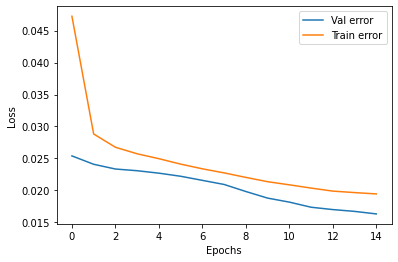

In [172]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout,Input,BatchNormalization , Add
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam





encoder_input = Input(393 ,name = 'input_encoder')
encoder = Dense(256, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = Dense(128, activation='relu',name = 'encoder_layer4')(encoder)
encoder = BatchNormalization(name = 'encoder_layer5')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer6')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer7')(encoder)
encoder_output = Dense(32, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
print(Encoder.summary())



decoder_input = Input(32,name = 'input_decoder')
decoder = Dense(32, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='tanh',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer4')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer5')(decoder)
decoder = BatchNormalization(name = 'decoder_layer6')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer7')(decoder)
decoder = Dense(256, activation='relu',name = 'decoder_layer8')(decoder)
decoder_output = Dense(393 ,activation = 'sigmoid',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
print(Decoder.summary())




autoencoder_input = Input(393 , name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data], name = 'autoencoder')
print(autoencoder.summary())




sgd = SGD(lr=0.005, momentum=0.99)
autoencoder.compile(optimizer=sgd, loss='mae')



lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-9)

history = autoencoder.fit(train_notfraud, train_notfraud,
                    batch_size = 64,
                    validation_split = 0.25,
                              epochs= 15,
                              callbacks=[lrr])

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')


plt.show()


In [174]:
test_predictions = autoencoder.predict(test)
threshold_fixed = 0.035




mae_test = np.mean(np.abs(test - test_predictions), axis=1)
isFraud_test = np.array(mae_test)
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] - threshold_fixed 

minMAE = min(isFraud_test)
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] + abs(minMAE)



maxMAE = max(isFraud_test)
scaler = 1/maxMAE
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] * scaler








(506691, 393)

NameError: name 'x_test_no_nan' is not defined

In [178]:
testId = pd.read_csv('test_identity.csv')
testTrans = pd.read_csv('test_transaction.csv')
testnew = pd.merge(testTrans, testId, on='TransactionID', how='left')


In [182]:

submission = pd.DataFrame(test['C1'])

submission['TransactionID'] = testnew['TransactionID']
submission['isFraud'] = isFraud_test
submission = submission.drop(['C1'], axis=1)

submission['isFraud'] = isFraud_test


submission.to_csv('submission.csv', index=False)

del testnew, testTrans, testId